In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10-million-passwords/10millionPasswords


In [2]:
file_path = os.path.join(dirname, filename)

# Try reading the file as CSV with different delimiter options
delimiters = [',', '\t', ';']  # Common delimiters: comma, tab, semicolon

for delimiter in delimiters:
    try:
        df = pd.read_csv(file_path, sep=delimiter)
        print("File successfully read with delimiter:", delimiter)
        print(df.head())  # Display the first few rows of the DataFrame
        break
    except pd.errors.ParserError:
        pass  # If the current delimiter doesn't work, try the next one
else:
    print("Unable to read the file as CSV with any delimiter.")

File successfully read with delimiter: ,
   rank   password
0     1     123456
1     2   password
2     3   12345678
3     4     qwerty
4     5  123456789


In [3]:
df.dropna()

,rank,password
0,1,123456
1,2,password
2,3,12345678
3,4,qwerty
4,5,123456789
...,...,...
999992,999993,vjht1051
999993,999994,vjht08
999994,999995,Vjht0409
999995,999996,vjht04


In [4]:
#We had to our dataset a medium-strong password, to see later his score
new_row = {'rank': '999998', 'password': 'GgnePm7w'}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [5]:
#create a new column, size, with the total size of the password
df['password'] = df['password'].astype(str)
password_size = lambda x : len(x)
df['size'] = df['password'].apply(password_size)
df.head()

,rank,password,size
0,1,123456,6
1,2,password,8
2,3,12345678,8
3,4,qwerty,6
4,5,123456789,9


In [6]:
#create a column uppercase, this is a boolean to say if our password contain an upper
df['contains_uppercase'] = df['password'].str.contains(r'[A-Z]')
#same for special character
df['contains_specialcharacter'] = df['password'].str.contains(r'[!@#$%^&*()_+{}|:;"\'<>,.?/\[\]\-]')
#same for number
df['contains_number'] = df['password'].str.contains(r'[0-9]')
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number
0,1,123456,6,False,False,True
1,2,password,8,False,False,False
2,3,12345678,8,False,False,True
3,4,qwerty,6,False,False,False
4,5,123456789,9,False,False,True


In [7]:
#convert them to int (0 = False 1= True) for an easiest data viz
df['contains_uppercase'] = df['contains_uppercase'].astype(int)
df['contains_specialcharacter'] = df['contains_specialcharacter'] .astype(int)
df['contains_number'] = df['contains_number'] .astype(int)

In [8]:
#create measure for the dataviz
#total size of the dataframe
df_size = len(df)
#sum of uppercase
df_uppercase_size = df['contains_uppercase'].sum()
#total - sum of uppercase
df_without_uppercase_size = df_size - df_uppercase_size

Password without uppercase: 870134
Password with uppercase: 129864


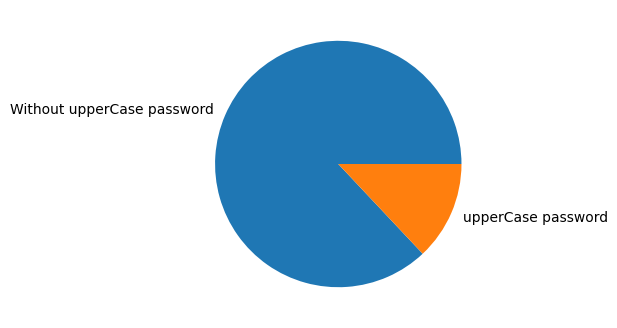

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4, 4))
x = [df_without_uppercase_size, df_uppercase_size]
plt.pie(x, labels = ['Without upperCase password', 'upperCase password'], normalize = True)
print('Password without uppercase:',df_without_uppercase_size)
print('Password with uppercase:',df_uppercase_size)


In [10]:
#sum of special character password
df_specialcharacter_size = df['contains_specialcharacter'].sum()
df_without_specialcharacter_size = df_size - df_specialcharacter_size

Password without special character: 990220
Password with special character: 9778


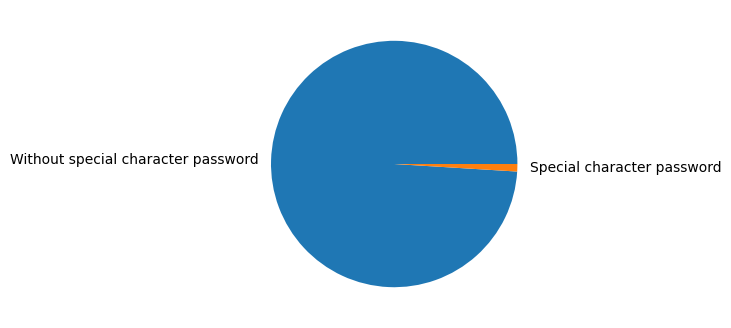

In [11]:
plt.figure(figsize = (4, 4))
x = [df_without_specialcharacter_size, df_specialcharacter_size]
plt.pie(x, labels = ['Without special character password', 'Special character password'], normalize = True)
print('Password without special character:',df_without_specialcharacter_size)
print('Password with special character:',df_specialcharacter_size)

In [12]:
#sum of password with a number
df_number_size = df['contains_number'].sum()
df_without_number_size = df_size - df_number_size

Password without number: 393907
Password with number: 606091


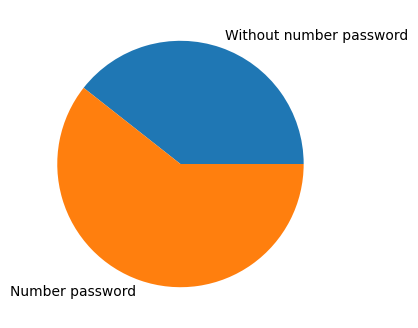

In [13]:
plt.figure(figsize = (4, 4))
x = [df_without_number_size, df_number_size]
plt.pie(x, labels = ['Without number password', 'Number password'], normalize = True)
print('Password without number:',df_without_number_size)
print('Password with number:',df_number_size)

In [14]:
#Count of size form password, to use it in barplot
value_counts_size = df['size'].value_counts()

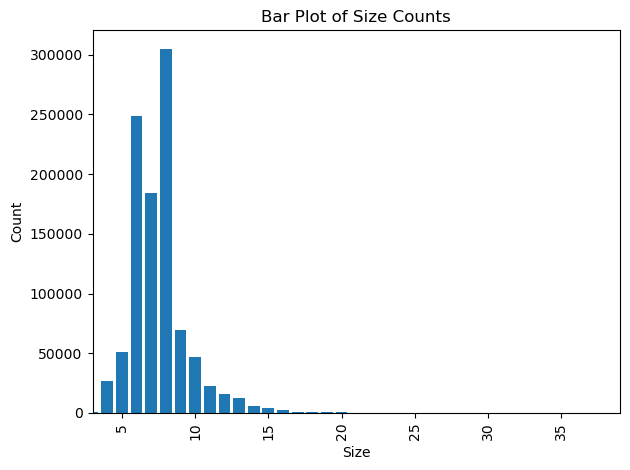

In [15]:
# Create a bar plot
plt.bar(value_counts_size.index, value_counts_size.values)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Bar Plot of Size Counts')
plt.xticks(rotation='vertical')
plt.xlim(min(value_counts_size.index), max(value_counts_size.index))
plt.tight_layout()
plt.show()

In [16]:
#extract string from password by removing number and special character
df['text_password'] = df['password'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password
0,1,123456,6,0,0,1,
1,2,password,8,0,0,0,password
2,3,12345678,8,0,0,1,
3,4,qwerty,6,0,0,0,qwerty
4,5,123456789,9,0,0,1,


In [17]:
#count how many time the string is use on the whole dataset 
password_occurrences = df['text_password'].value_counts()
df['password_occurrence'] = df['text_password'].map(password_occurrences)
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password,password_occurrence
0,1,123456,6,0,0,1,,165520
1,2,password,8,0,0,0,password,150
2,3,12345678,8,0,0,1,,165520
3,4,qwerty,6,0,0,0,qwerty,308
4,5,123456789,9,0,0,1,,165520


In [18]:
import nltk
from nltk.corpus import words

# Create a set of English words from NLTK corpus
english_words = set(words.words())  

def contains_existing_word(password):
    # Extract words from the password in lowercase.
    words_in_password = re.findall(r'\w+', password.lower())  
    for word in words_in_password:
        #Check if the word is an English word or title case 
        if word in english_words or word.istitle():  
            return True  
    return False  


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
#use contains_existing_word function on our dataset
df['contains_existing_word'] = df['password'].apply(contains_existing_word)

In [20]:
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password,password_occurrence,contains_existing_word
0,1,123456,6,0,0,1,,165520,False
1,2,password,8,0,0,0,password,150,True
2,3,12345678,8,0,0,1,,165520,False
3,4,qwerty,6,0,0,0,qwerty,308,False
4,5,123456789,9,0,0,1,,165520,False


In [21]:
def has_consecutive_characters(password, length=3):
    #Check if a given password contains consecutive characters of a certain length
    for i in range(len(password) - length + 1):
        is_consecutive = True
        for j in range(length - 1):
            # Compare the Unicode values of characters to check for consecutive sequence
            if ord(password[i + j + 1]) != ord(password[i + j]) + 1:
                is_consecutive = False
                break
        if is_consecutive:
            return True
    return False


df['has_consecutive'] = df['password'].apply(lambda x: has_consecutive_characters(x))


In [22]:
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password,password_occurrence,contains_existing_word,has_consecutive
0,1,123456,6,0,0,1,,165520,False,True
1,2,password,8,0,0,0,password,150,True,False
2,3,12345678,8,0,0,1,,165520,False,True
3,4,qwerty,6,0,0,0,qwerty,308,False,False
4,5,123456789,9,0,0,1,,165520,False,True


In [23]:
# Calculate the maximum occurrence count in the 'password_occurrence' column
max_occurrence = df['password_occurrence'].max()

# Calculate and assign normalized occurrence values to the 'normalized_occurrence' column
df['normalized_occurrence'] = df['password_occurrence'] / max_occurrence

In [24]:
def has_keyboard_sequence(password):
    #Check if password contain specific keyboard sequence, often use in bad password
    keyboard_sequences = ['qwerty', 'asdfgh', 'zxcvbn','12345','123456', '1234567', '12345678', '1234567890']
    for sequence in keyboard_sequences:
        if sequence in password:
            return True
    return False

df['has_keyboard_sequence'] = df['password'].apply(has_keyboard_sequence)

In [25]:
#Count unique character in password
count_unique_characters = lambda password: len(set(password))
df['unique_characters_count'] = df['password'].apply(count_unique_characters)

In [26]:
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password,password_occurrence,contains_existing_word,has_consecutive,normalized_occurrence,has_keyboard_sequence,unique_characters_count
0,1,123456,6,0,0,1,,165520,False,True,1.000000,True,6
1,2,password,8,0,0,0,password,150,True,False,0.000906,False,7
2,3,12345678,8,0,0,1,,165520,False,True,1.000000,True,8
3,4,qwerty,6,0,0,0,qwerty,308,False,False,0.001861,True,6
4,5,123456789,9,0,0,1,,165520,False,True,1.000000,True,9


In [27]:
# List of boolean columns to be converted to integer values for uniformity in DataFrame and visualization
boolean_columns = ['contains_uppercase', 'contains_specialcharacter', 'contains_number', 'contains_existing_word', 'has_consecutive', 'has_keyboard_sequence']

# Convert selected boolean columns to integer values for consistency in DataFrame and visualization
df[boolean_columns] = df[boolean_columns].astype(int)


In [28]:
#Save to CSV
df.to_csv('/kaggle/working/data.csv', index=False)  

In [29]:
def calculate_score(row):
    
    #Calculate a password strength score based on the given weights for different password features

    weights = {
        'size': 0.05,
        'contains_uppercase': 2,
        'contains_specialcharacter': 5,
        'contains_number': 0.1,
        'normalized_occurrence': -1,
        'contains_existing_word': -10,
        'has_consecutive': -0.2,
        'has_keyboard_sequence': -3,
        'unique_characters_count': 1
    }
    
    score = 0
    for feature, weight in weights.items():
        # Check if the feature value is a boolean and calculate score accordingly
        if isinstance(row[feature], bool):
            score += row[feature] * weight
        else:
            # For non-boolean features, calculate score by multiplying feature value with weight
            score += row[feature] * weight
    return score

# Apply the calculate_score function to each row of the DataFrame and store the results in the 'score' column
df['score'] = df.apply(calculate_score, axis=1)


In [30]:
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password,password_occurrence,contains_existing_word,has_consecutive,normalized_occurrence,has_keyboard_sequence,unique_characters_count,score
0,1,123456,6,0,0,1,,165520,0,1,1.000000,1,6,2.200000
1,2,password,8,0,0,0,password,150,1,0,0.000906,0,7,-2.600906
2,3,12345678,8,0,0,1,,165520,0,1,1.000000,1,8,4.300000
3,4,qwerty,6,0,0,0,qwerty,308,0,0,0.001861,1,6,3.298139
4,5,123456789,9,0,0,1,,165520,0,1,1.000000,1,9,5.350000


In [31]:
#Check password with the biggest score
max_score_index = df['score'].idxmax()
row_with_max_score = df.loc[max_score_index]
print(row_with_max_score)

rank                                                  829180
password                     you_have_been_hacked_gWSxH1FZfr
size                                                      31
contains_uppercase                                         1
contains_specialcharacter                                  1
contains_number                                            1
text_password                     youhavebeenhackedgWSxHFZfr
password_occurrence                                        1
contains_existing_word                                     0
has_consecutive                                            0
normalized_occurrence                               0.000006
has_keyboard_sequence                                      0
unique_characters_count                                   23
score                                              31.649994
Name: 829179, dtype: object


In [32]:
#same with the lowest score 
max_score_index = df['score'].idxmin()
row_with_max_score = df.loc[max_score_index]
print(row_with_max_score)

rank                            24694
password                          bob
size                                3
contains_uppercase                  0
contains_specialcharacter           0
contains_number                     0
text_password                     bob
password_occurrence               142
contains_existing_word              1
has_consecutive                     0
normalized_occurrence        0.000858
has_keyboard_sequence               0
unique_characters_count             2
score                       -7.850858
Name: 24693, dtype: object


In [33]:
#Check the medium-strong password we insert in the beggining  
df.iloc[999997]

rank                            999998
password                      GgnePm7w
size                                 8
contains_uppercase                   1
contains_specialcharacter            0
contains_number                      1
text_password                  GgnePmw
password_occurrence                  1
contains_existing_word               0
has_consecutive                      0
normalized_occurrence         0.000006
has_keyboard_sequence                0
unique_characters_count              8
score                        10.499994
Name: 999997, dtype: object

In [34]:
#So the threshold score will be fixed at 10, we could have created more category based on the score
threshold = 10

df['classification'] = df['score'].apply(lambda score: 1  if score >= threshold else 0)


In [35]:
df.head()

,rank,password,size,contains_uppercase,contains_specialcharacter,contains_number,text_password,password_occurrence,contains_existing_word,has_consecutive,normalized_occurrence,has_keyboard_sequence,unique_characters_count,score,classification
0,1,123456,6,0,0,1,,165520,0,1,1.000000,1,6,2.200000,0
1,2,password,8,0,0,0,password,150,1,0,0.000906,0,7,-2.600906,0
2,3,12345678,8,0,0,1,,165520,0,1,1.000000,1,8,4.300000,0
3,4,qwerty,6,0,0,0,qwerty,308,0,0,0.001861,1,6,3.298139,0
4,5,123456789,9,0,0,1,,165520,0,1,1.000000,1,9,5.350000,0


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


# Step 1: Prepare the Data (Using the first 100 rows)
df_subset = df  
X = df_subset['password']
y = df_subset['classification']  # Target labels

# Step 2: Feature Extraction
vectorizer = CountVectorizer(analyzer='char')  # Convert passwords into character n-grams
X_transformed = vectorizer.fit_transform(X)

# Step 3: Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_transformed, y)

# Step 4: Evaluate the Model 
y_pred = clf.predict(X_transformed)
accuracy = accuracy_score(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_rep)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    920176
           1       0.98      0.95      0.97     79822

    accuracy                           0.99    999998
   macro avg       0.99      0.97      0.98    999998
weighted avg       0.99      0.99      0.99    999998



In [37]:
#Classify password "test"
new_document = ["test"]
new_document_transformed = vectorizer.transform(new_document)
prediction = clf.predict(new_document_transformed)
print("Predicted Classification:", prediction)

Predicted Classification: [0]


In [38]:
#Classify password "Repzo854@..lmao"
new_document = ["Repzo854@..lmao"]
new_document_transformed = vectorizer.transform(new_document)
prediction = clf.predict(new_document_transformed)
print("Predicted Classification:", prediction)

Predicted Classification: [1]


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['password'])

# Transform the password you want to check
password_to_check = 'paszworld'
password_tfidf = vectorizer.transform([password_to_check])

# Calculate cosine similarity between the password and the entire column
cosine_similarities = cosine_similarity(password_tfidf, tfidf_matrix)

max_similarity_index = cosine_similarities.argmax()
print(max_similarity_index)

# Extract the most similar password and its similarity value
most_similar_password = df['password'][max_similarity_index]
max_similarity_value = cosine_similarities[0, max_similarity_index]
print(most_similar_password, max_similarity_value)


0
123456 0.0


In [40]:

import Levenshtein
# Password to check
password_to_check = 'paszworld'

# Calculate Levenshtein distances
lev_distances = [Levenshtein.distance(password_to_check, password) for password in df['password']]

# Find the index of the most similar password based on the minimum Levenshtein distance
min_distance_index = lev_distances.index(min(lev_distances))

# Extract the most similar password and its Levenshtein distance
most_similar_password = df['password'][min_distance_index]
min_lev_distance = lev_distances[min_distance_index]

print(f"The most similar password is '{most_similar_password}' with a Levenshtein distance of {min_lev_distance}.")


The most similar password is 'passworld' with a Levenshtein distance of 1.
